In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x=pd.read_csv("C:\\Users\\aditya\\Downloads\\archive (5)\\synthetic_financial_data.csv")

In [3]:
x

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1056,2023,8935.28,2023-01-01 02:46:35,1,MasterCard,City-39,Restaurant,36,Purchase at Merchant-2023
9996,9997,1053,2026,30.15,2023-01-01 02:46:36,0,MasterCard,City-32,Retail,42,Purchase at Merchant-2026
9997,9998,1041,2034,6333.64,2023-01-01 02:46:37,0,American Express,City-1,Online Shopping,36,Purchase at Merchant-2034
9998,9999,1009,2019,2837.13,2023-01-01 02:46:38,1,Visa,City-11,Retail,57,Purchase at Merchant-2019


In [4]:
x.iloc[:,4]

0       2023-01-01 00:00:00
1       2023-01-01 00:00:01
2       2023-01-01 00:00:02
3       2023-01-01 00:00:03
4       2023-01-01 00:00:04
               ...         
9995    2023-01-01 02:46:35
9996    2023-01-01 02:46:36
9997    2023-01-01 02:46:37
9998    2023-01-01 02:46:38
9999    2023-01-01 02:46:39
Name: transaction_time, Length: 10000, dtype: object

In [5]:
col=[1,4]
z=x.drop(x.columns[col],axis=1)
name_mapping = {
    'MasterCard': 'Paytm',
    'Visa': 'PhonePe',
    'Discover': 'GPay',
    'American Express': 'Amazonpay'
}
z["card_type"] = z["card_type"].replace(name_mapping)
z.rename(columns={"card_type":"mode"}, inplace=True)


In [6]:
z

,transaction_id,merchant_id,amount,is_fraudulent,mode,location,purchase_category,customer_age,transaction_description
0,1,2027,5758.59,0,Paytm,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,2053,1901.56,1,PhonePe,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,2035,1248.86,1,Paytm,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,2037,7619.05,1,GPay,City-6,Travel,59,Purchase at Merchant-2037
4,5,2083,1890.10,1,Paytm,City-34,Retail,36,Purchase at Merchant-2083
...,...,...,...,...,...,...,...,...,...
9995,9996,2023,8935.28,1,Paytm,City-39,Restaurant,36,Purchase at Merchant-2023
9996,9997,2026,30.15,0,Paytm,City-32,Retail,42,Purchase at Merchant-2026
9997,9998,2034,6333.64,0,Amazonpay,City-1,Online Shopping,36,Purchase at Merchant-2034
9998,9999,2019,2837.13,1,PhonePe,City-11,Retail,57,Purchase at Merchant-2019


In [7]:
z.shape

(10000, 9)

In [8]:
z.rename(columns={'customer_age': 'debit'}, inplace=True)

In [9]:
z

,transaction_id,merchant_id,amount,is_fraudulent,mode,location,purchase_category,debit,transaction_description
0,1,2027,5758.59,0,Paytm,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,2053,1901.56,1,PhonePe,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,2035,1248.86,1,Paytm,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,2037,7619.05,1,GPay,City-6,Travel,59,Purchase at Merchant-2037
4,5,2083,1890.10,1,Paytm,City-34,Retail,36,Purchase at Merchant-2083
...,...,...,...,...,...,...,...,...,...
9995,9996,2023,8935.28,1,Paytm,City-39,Restaurant,36,Purchase at Merchant-2023
9996,9997,2026,30.15,0,Paytm,City-32,Retail,42,Purchase at Merchant-2026
9997,9998,2034,6333.64,0,Amazonpay,City-1,Online Shopping,36,Purchase at Merchant-2034
9998,9999,2019,2837.13,1,PhonePe,City-11,Retail,57,Purchase at Merchant-2019


In [10]:
z['debit'] = 0

for i in range(len(z) - 1):
    difference = z.at[i + 1, 'amount'] - z.at[i, 'amount']
    z.at[i + 1, 'debit'] = max(0, difference)

C:\Users\aditya\AppData\Local\Temp\ipykernel_15928\2693912571.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6370.1900000000005' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  z.at[i + 1, 'debit'] = max(0, difference)


In [11]:
z

,transaction_id,merchant_id,amount,is_fraudulent,mode,location,purchase_category,debit,transaction_description
0,1,2027,5758.59,0,Paytm,City-30,Gas Station,0.00,Purchase at Merchant-2027
1,2,2053,1901.56,1,PhonePe,City-47,Online Shopping,0.00,Purchase at Merchant-2053
2,3,2035,1248.86,1,Paytm,City-6,Gas Station,0.00,Purchase at Merchant-2035
3,4,2037,7619.05,1,GPay,City-6,Travel,6370.19,Purchase at Merchant-2037
4,5,2083,1890.10,1,Paytm,City-34,Retail,0.00,Purchase at Merchant-2083
...,...,...,...,...,...,...,...,...,...
9995,9996,2023,8935.28,1,Paytm,City-39,Restaurant,1536.74,Purchase at Merchant-2023
9996,9997,2026,30.15,0,Paytm,City-32,Retail,0.00,Purchase at Merchant-2026
9997,9998,2034,6333.64,0,Amazonpay,City-1,Online Shopping,6303.49,Purchase at Merchant-2034
9998,9999,2019,2837.13,1,PhonePe,City-11,Retail,0.00,Purchase at Merchant-2019


In [12]:
z['credit'] = 0

for i in range(len(z) - 1):
    difference = z.at[i + 1, 'amount'] - z.at[i, 'amount']
    z.at[i + 1, 'credit'] = max(0, -difference)


C:\Users\aditya\AppData\Local\Temp\ipykernel_15928\1620508861.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3857.03' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  z.at[i + 1, 'credit'] = max(0, -difference)


In [13]:
z

,transaction_id,merchant_id,amount,is_fraudulent,mode,location,purchase_category,debit,transaction_description,credit
0,1,2027,5758.59,0,Paytm,City-30,Gas Station,0.00,Purchase at Merchant-2027,0.00
1,2,2053,1901.56,1,PhonePe,City-47,Online Shopping,0.00,Purchase at Merchant-2053,3857.03
2,3,2035,1248.86,1,Paytm,City-6,Gas Station,0.00,Purchase at Merchant-2035,652.70
3,4,2037,7619.05,1,GPay,City-6,Travel,6370.19,Purchase at Merchant-2037,0.00
4,5,2083,1890.10,1,Paytm,City-34,Retail,0.00,Purchase at Merchant-2083,5728.95
...,...,...,...,...,...,...,...,...,...,...
9995,9996,2023,8935.28,1,Paytm,City-39,Restaurant,1536.74,Purchase at Merchant-2023,0.00
9996,9997,2026,30.15,0,Paytm,City-32,Retail,0.00,Purchase at Merchant-2026,8905.13
9997,9998,2034,6333.64,0,Amazonpay,City-1,Online Shopping,6303.49,Purchase at Merchant-2034,0.00
9998,9999,2019,2837.13,1,PhonePe,City-11,Retail,0.00,Purchase at Merchant-2019,3496.51


In [14]:
z=x.drop(x.columns[col],axis=1)


In [15]:
z.shape

(10000, 9)

In [16]:
unique_elements = z["mode"].unique()
print(unique_elements)

KeyError: 'mode'

In [ ]:
ele = z['mode'].value_counts()
ele

mode
GPay         2633
Amazonpay    2494
PhonePe      2490
Paytm        2383
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1965aafc6a0>,
 [Text(-1.190021572480187, -0.15443010403345248, 'Paytm'),
  Text(0.1849598504842746, -1.0843384405750978, 'PhonePe'),
  Text(1.0852544462190759, 0.1795070666066577, 'GPay'),
  Text(-0.1360759469822085, 1.091550885965879, 'Amazonpay')],
 [Text(-0.6941792506134424, -0.09008422735284727, '26.3%'),
  Text(0.10088719117324067, -0.5914573312227805, '24.9%'),
  Text(0.5919569706649505, 0.09791294542181327, '24.9%'),
  Text(-0.07422324380847736, 0.5953913923450248, '23.8%')])

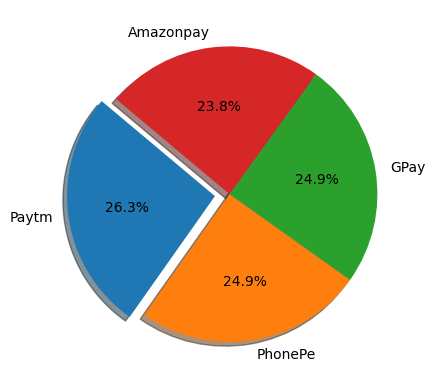

In [ ]:
explode = (0.1, 0, 0, 0) 
# plt.pie(ele, labels=unique_elements, autopct='%1.1f%%', startangle=140, explode=explode)
plt.pie(ele, labels=unique_elements, autopct='%1.1f%%', startangle=140, shadow=True,explode=explode)

# plt.pie(ele, labels=unique_elements, autopct='%1.1f%%', startangle=140)

In [ ]:
kio= z['purchase_category'].value_counts()
kio


purchase_category
Travel             1694
Groceries          1692
Gas Station        1666
Retail             1661
Online Shopping    1651
Restaurant         1636
Name: count, dtype: int64

In [ ]:
uniq = z["purchase_category"].unique()
print(uniq)

['Gas Station' 'Online Shopping' 'Travel' 'Retail' 'Groceries'
 'Restaurant']


([<matplotlib.patches.Wedge at 0x196560e3f10>,
 [Text(-1.0848888053521877, 0.18170382500515284, 'Gas Station'),
  Text(-0.7480005608089172, -0.9383470365645887, 'Online Shopping'),
  Text(0.41000160839289107, -1.0207343832335827, 'Travel'),
  Text(1.0886715674762073, -0.15746179907805655, 'Retail'),
  Text(0.6864775634502445, 0.8595048312135399, 'Groceries'),
  Text(-0.3861630742399777, 1.0299893592137395, 'Restaurant')],
 [Text(-0.5917575301921023, 0.09911117727553789, '16.9%'),
  Text(-0.4363336604718683, -0.5473691046626767, '16.9%'),
  Text(0.22363724094157691, -0.5567642090364996, '16.7%'),
  Text(0.5938208549870221, -0.08588825404257629, '16.6%'),
  Text(0.3744423073364969, 0.46882081702556716, '16.5%'),
  Text(-0.21063440413089693, 0.5618123777529487, '16.4%')])

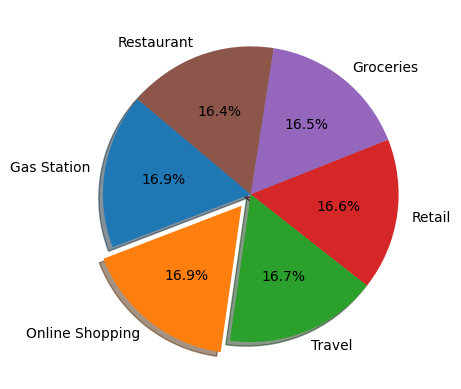

In [ ]:
explode = (0, 0.1, 0, 0,0,0) 

plt.pie(kio, labels=uniq, autopct='%1.1f%%', startangle=140,shadow=True,explode=explode)

<BarContainer object of 4 artists>

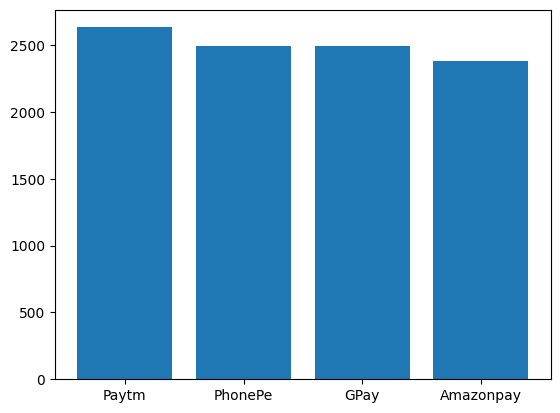

In [ ]:
plt.bar(unique_elements,ele)

In [ ]:
zse = z[z['debit'] > 0]['debit']

In [ ]:
sd=np.array(zse)
sd=sd[:200]
sd.shape

(200,)

In [ ]:
zser = z[z['debit'] > 0]['mode']

In [ ]:
gh=np.array(zser)
gh=gh[:200]
gh.shape

(200,)

<BarContainer object of 200 artists>

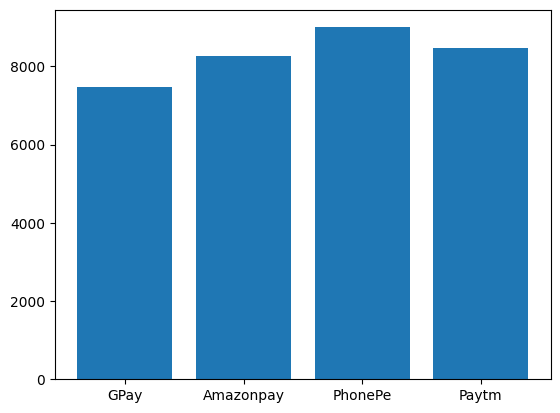

In [ ]:
plt.bar(gh,sd)

<BarContainer object of 4955 artists>

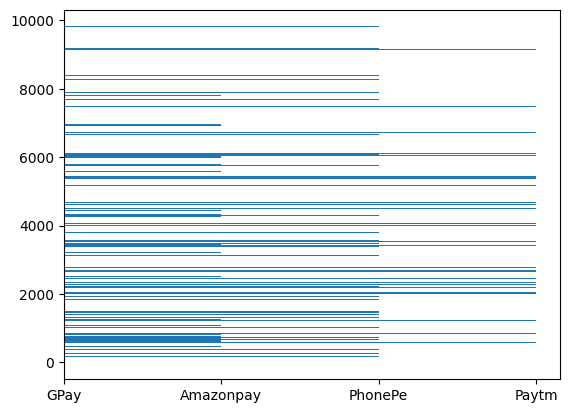

In [ ]:
plt.barh(zse,zser)